# Day 12 - passage pathing

From notes at https://www.python.org/doc/essays/graphs/

In [23]:
with open('day_12_passage_pathing/input.txt') as f:
    data = [l.strip() for l in f.readlines()]

In [24]:
data[:5]

['OU-xt', 'hq-xt', 'br-HP', 'WD-xt', 'end-br']

In [34]:
from collections import defaultdict, Counter

In [26]:
caves = defaultdict(list)
for l in data:
    fr, to = l.split('-')
    caves[fr].append(to)
    caves[to].append(fr)

In [27]:
caves

defaultdict(list,
            {'OU': ['xt', 'start', 'qw', 'hq'],
             'xt': ['OU', 'hq', 'WD', 'br', 'MH', 'qw'],
             'hq': ['xt', 'br', 'MH', 'start', 'OU'],
             'br': ['HP', 'end', 'hq', 'xt', 'MH', 'WD'],
             'HP': ['br'],
             'WD': ['xt', 'end', 'hm', 'br', 'qw'],
             'end': ['br', 'WD', 'qw'],
             'start': ['OU', 'MH', 'hq'],
             'MH': ['hq', 'start', 'br', 'xt', 'qw'],
             'qw': ['OU', 'MH', 'WD', 'end', 'xt'],
             'hm': ['WD']})

In [28]:
def can_visit_node_p1(path, node):
    return (node not in path) or (node.isupper())

def find_paths(graph, start, end, revisit_checker, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph.keys():
        return []
    paths = []
    for node in graph[start]:
        if revisit_checker(path, node):
            newpaths = find_paths(graph, node, end, revisit_checker, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [29]:
paths = find_paths(caves, 'start', 'end', can_visit_node_p1)

In [30]:
len(paths)

3495

In [31]:
def can_visit_node_p2(path, node):
    if can_visit_node_p1(path, node):
        return True
    if node in ['start', 'end']:
        # this would be a revisit, as p1 check has said it's in the path already
        return False
    unique_counts = Counter(path)
    for n, c in unique_counts.items():
        if c > 1 and n.islower():
            return False
    return True

In [32]:
paths2 = find_paths(caves, 'start', 'end', can_visit_node_p2)

In [33]:
len(paths2)

94849

# Day 14 - polymerization

In [22]:
import re
from itertools import zip_longest
from collections import Counter

In [320]:
with open('day_14_polymers/input.txt') as f:
    template = f.readline().strip()
    f.readline()
    data = [l.strip().split(' -> ') for l in f.readlines()]

In [339]:
template

'BCHCKFFHSKPBSNVVKVSK'

In [340]:
data[:5]

[['OV', 'V'], ['CO', 'V'], ['CS', 'O'], ['NP', 'H'], ['HH', 'P']]

In [341]:
insertion_rules = {k:v for k, v in data}

In [160]:
def polymerize_step(input_polymer):
    insertions = {}
    for k, v in insertion_rules.items():
        insertion_points = [m.start()+1 for m in re.finditer(f'(?={k})', input_polymer)]
        insertions.update({i: v for i in insertion_points})
    insertion_points = sorted(insertions)
    insertion_vals = [insertions[k] for k in insertion_points]
    cleaved_parts = [input_polymer[i:j] for i,j in zip([0]+insertion_points, insertion_points+[None])]
    new_parts = [val for pair in zip_longest(cleaved_parts, insertion_vals) for val in pair if val is not None] 
    polymer = "".join(new_parts)
    return polymer

In [163]:
polymer = template
for i in range(20):
    polymer = polymerize_step(polymer)

In [164]:
len(polymer)

19922945

In [162]:
occs = Counter(polymer)
ordered = sorted(occs, key=occs.get)
least = occs[ordered[0]]
most = occs[ordered[-1]]
most - least

2797

In [279]:
from more_itertools import pairwise

In [349]:
pair_counts = Counter(pairwise(template))
totals = Counter(template)

In [345]:
template

'BCHCKFFHSKPBSNVVKVSK'

In [346]:
insertion_rules

{'OV': 'V',
 'CO': 'V',
 'CS': 'O',
 'NP': 'H',
 'HH': 'P',
 'KO': 'F',
 'VO': 'B',
 'SP': 'O',
 'CB': 'N',
 'SB': 'F',
 'CF': 'S',
 'KS': 'P',
 'OH': 'H',
 'NN': 'O',
 'SF': 'K',
 'FH': 'F',
 'VV': 'B',
 'VH': 'O',
 'BV': 'V',
 'KF': 'K',
 'CC': 'F',
 'NF': 'H',
 'VS': 'O',
 'SK': 'K',
 'HV': 'O',
 'CK': 'K',
 'VP': 'F',
 'HP': 'S',
 'CN': 'K',
 'OB': 'H',
 'NS': 'F',
 'PS': 'S',
 'KB': 'S',
 'VF': 'S',
 'FP': 'H',
 'BB': 'N',
 'HF': 'V',
 'CH': 'N',
 'BH': 'F',
 'KK': 'B',
 'OO': 'N',
 'NO': 'K',
 'BP': 'K',
 'KH': 'P',
 'KN': 'P',
 'OF': 'B',
 'VC': 'F',
 'NK': 'F',
 'ON': 'O',
 'OC': 'P',
 'VK': 'O',
 'SH': 'C',
 'NH': 'C',
 'FB': 'B',
 'FC': 'K',
 'OP': 'O',
 'PV': 'V',
 'BN': 'V',
 'PC': 'K',
 'PK': 'S',
 'FF': 'C',
 'SV': 'S',
 'HK': 'H',
 'NB': 'C',
 'OK': 'C',
 'PH': 'B',
 'SO': 'O',
 'PP': 'F',
 'KV': 'V',
 'FO': 'B',
 'FN': 'H',
 'HN': 'C',
 'VB': 'K',
 'CV': 'O',
 'BC': 'C',
 'CP': 'S',
 'FS': 'S',
 'KP': 'V',
 'BS': 'V',
 'BK': 'B',
 'PN': 'C',
 'PF': 'S',
 'HO': 'V',
 'NC

In [350]:
for _ in range(40):
    for pair, count in pair_counts.copy().items():
        joined = "".join(pair)
        inserted_elem = insertion_rules[joined]
        newpair = (pair[0], inserted_elem)
        pair_counts[newpair] += count
        newpair = (inserted_elem, pair[1])
        pair_counts[newpair] += count
        pair_counts[pair] -= count
        totals[inserted_elem] += count

In [351]:
totals.most_common()[0][1] - totals.most_common()[-1][1] 

2926813379532

### part 2 - TBD, needs counting

# Day 15 - Chitons

In [165]:
import numpy as np

In [176]:
arr = np.genfromtxt('./day_15_chitons/input.txt', delimiter=1)

In [177]:
arr

array([[7., 2., 5., ..., 1., 2., 9.],
       [9., 1., 9., ..., 4., 2., 9.],
       [5., 6., 7., ..., 3., 8., 5.],
       ...,
       [6., 3., 8., ..., 9., 6., 1.],
       [7., 8., 4., ..., 1., 8., 4.],
       [1., 4., 2., ..., 9., 8., 9.]])

In [168]:
arr.shape

(100, 100)

In [169]:
from skimage.graph import MCP

In [170]:
cost = MCP(arr, fully_connected=False)

In [174]:
cumcost, traceback = cost.find_costs(starts=[[0, 0]], ends=[[99, 99]])

In [185]:
cumcost[99,99] - cumcost[0,0]

508.0

In [182]:
from matplotlib.pyplot import imshow

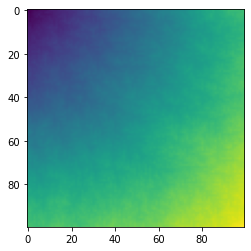

In [183]:
imshow(cumcost)

In [245]:
big_map = np.concatenate([np.concatenate([arr + i for i in range(5)]) + j for j in range(5)], axis=1)
#wrapped = big_map > 9
big_map = big_map % 9
big_map[big_map==0] = 9

In [248]:
big_cost = MCP(big_map, fully_connected=False)

In [249]:
cumcost2, traceback2 = big_cost.find_costs(starts=[[0,0]], ends=[[499,499]])

In [250]:
cumcost2[499,499] - cumcost2[0, 0]

2872.0

In [273]:
routemap = np.zeros_like(cumcost2)
route = big_cost.traceback([499,499])
route[:10]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 7),
 (2, 7)]

In [274]:
rows, cols = (zip(*route))

In [275]:
routemap[rows, cols] = 1

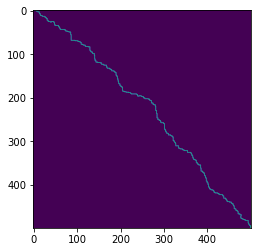

In [276]:
imshow(routemap)

# Day 16 - Packet Decoder
That can fuck right off

# Day 17 - Trick Shot

In [353]:
with open('day_17_trick_shot/input.txt') as f:
    data = f.read()
data

'target area: x=207..263, y=-115..-63\n'

In [ ]:
# s = ut + .5 a t^2
207 = -1 * t

#v^2 = u^2 + 2as
# 0 =  u^2 -414
import math
x  = math.sqrt(414)
x = 21 or 22

In [358]:
ydim = -115 - -63
ydim
# y velocity must be < this

-52

distance from apogee over which probe will reach y velocity of 52
52^2 = 0 + 2*s
s  = 1352 = total falling distance

1352-63 = 1289 = the apogee height

6555 is the answer

# Day 18 - Snailfish

Nope.

# Day 19 - Beacon Scanner

Nope, nope, extra nope.

# Day 20 - Trench Map

In [387]:
with open('./day_20_trench_map/input.txt') as f:
    algo_ = f.readline().strip()
    f.readline()
    data = [list(l.replace('.','0').replace('#','1').strip()) for l in f.readlines()]

In [526]:
trenchmap = np.asarray(data).astype(int)
trenchmap[:10, :10]

array([[1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0]])

In [389]:
algo = np.asarray(list(algo_.replace('.','0').replace('#','1'))).astype(int)

In [511]:
from scipy.ndimage import convolve, correlate

In [440]:
# define a kernel to replace each element with the number represented by the binary digits contained in 
# the 3x3 footprint of that number
k = np.array([[256,128,64],
             [32,16,8],
             [4,2,1]])

In [527]:
convolve(trenchmap, weights=k, mode='constant', cval=0)

array([[176, 120,  24, ...,  56, 280, 136],
       [278, 143, 323, ..., 135, 355, 145],
       [418, 209, 360, ..., 336, 172,  82],
       ...,
       [434, 473, 460, ..., 369, 156,  74],
       [438, 507, 249, ..., 430, 211,  73],
       [ 54,  63,  31, ...,  53,  26,   9]])

it turns out that what I thought convolve did, is actually done by "correlate"

In [530]:
correlate(trenchmap, weights=k, mode='constant', cval=0)[:10,:10]

array([[ 26,  60,  48,  41,  27,  62,  52,  32,   0,   9],
       [209, 482, 389, 330, 220, 497, 418, 261,   3,  79],
       [139, 278,  45,  83, 231, 398, 277,  42,  29, 123],
       [ 90, 180, 360, 152, 312, 112, 168, 336, 232, 472],
       [209, 419, 327, 198, 452, 384, 320, 128, 320, 192],
       [139, 287,  63,  55,  39,   7,   6,   5,   2,   4],
       [ 89, 251, 511, 447, 318,  60,  49,  43,  23,  39],
       [202, 477, 506, 508, 497, 483, 398, 349, 187, 319],
       [ 81, 235, 471, 487, 399, 286, 116, 233, 474, 509],
       [137, 347, 191, 319, 126, 244, 416, 329, 210, 493]])

In [399]:
from matplotlib.pyplot import imshow

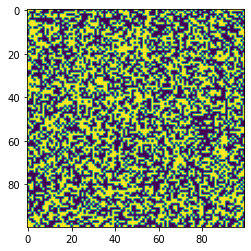

In [401]:
imshow(trenchmap)

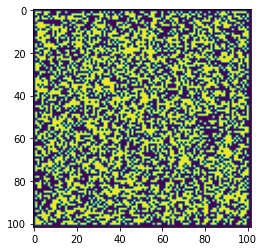

In [536]:
# the image needs to be 1 pixel larger than the input and the value in the padding should be zero to 
# ensure that the top-left pixel is the same as 
padded = np.pad(trenchmap, 1, mode='constant')
imshow(padded)

In [537]:
padded[:10,:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [538]:
# every time we run correlate the image grows by 1 pixel on each side (i.e. 2 pixels per dimension)
# However because of the initial pad (to create 'padded') with cval of 0 we now use padding with 
# 'edge' mode to ensure that the new padding is also zero and this avoids the edge
correlated = correlate(np.pad(padded, 1, mode='edge'), weights=k, mode='nearest')
correlated

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   1,   3, ...,   4,   0,   0],
       [  0,   9,  26, ...,  34,   4,   0],
       ...,
       [  0,  72, 216, ..., 288,   0,   0],
       [  0,  64, 192, ..., 256,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [539]:
correlated[:10,:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   3,   7,   6,   5,   3,   7,   6,   4],
       [  0,   9,  26,  60,  48,  41,  27,  62,  52,  32],
       [  0,  72, 209, 482, 389, 330, 220, 497, 418, 261],
       [  0,  65, 139, 278,  45,  83, 231, 398, 277,  42],
       [  0,   9,  90, 180, 360, 152, 312, 112, 168, 336],
       [  0,  72, 209, 419, 327, 198, 452, 384, 320, 128],
       [  0,  65, 139, 287,  63,  55,  39,   7,   6,   5],
       [  0,   8,  89, 251, 511, 447, 318,  60,  49,  43],
       [  0,  65, 202, 477, 506, 508, 497, 483, 398, 349]])

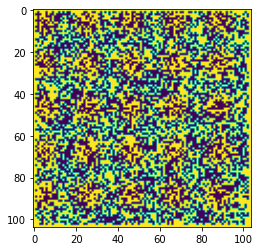

In [540]:
enh1 = (algo[correlated])
imshow(enh1)

In [541]:
enh1[:10,:10]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 1, 1]])

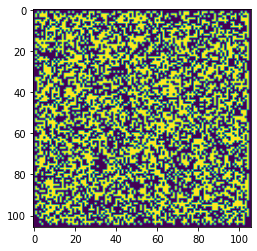

In [543]:
correlated2 = correlate(np.pad(enh1, 1, mode='edge'), weights=k, mode='nearest')
enh2 = (algo[correlated2])
imshow(enh2)

In [544]:
enh2.shape

(106, 106)

In [545]:
enh2.sum()

5379

In [546]:
# Loop it all together to solve either part

Part 1: 5379
Part 2: 17917


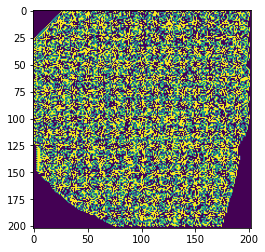

In [547]:
img = np.pad(trenchmap, 1, mode='constant') # pad with zero
for step in range(50):
    # pad with edgemost, i.e. zero at first
    correlated = correlate(np.pad(img, 1, mode='edge'), weights=k, mode='nearest')
    img = algo[correlated]
    if step==1:
        print(f"Part 1: {img.sum()}")
print(f"Part 2: {img.sum()}")
imshow(img)

In [550]:
correlated.shape

(202, 202)

In [548]:
# this solution from https://github.com/HrRodan/adventofcode2021/blob/master/day20/day20.py
# gave me the right answer that i was aiming for and helped to fiure out the padding issues

import numpy as np
from scipy import ndimage

COUNT_OPT = 2

with open('day_20_trench_map/input.txt', 'r') as file:
    decode, input_map = file.read().strip().split('\n\n')

decode = np.fromiter((True if char == '#' else False for char in decode.strip()), dtype=bool, count=len(decode.strip()))

input_array = np.array([[True if char == '#' else False for char in line]
                        for line in input_map.split('\n') if line.strip()]).astype(bool)


def decode_image(subarray: np.array):
    # astype of numpy had bad performance
    return decode[int(''.join('1' if bool_ else '0' for bool_ in subarray), 2)]


# initial pad of False value
output = np.pad(input_array, 1, mode='constant', constant_values=False)
for i in range(COUNT_OPT):
    # expand edge/nearest to account for possibility of decode[0]==True
    output = ndimage.generic_filter(np.pad(output, 1, mode='edge'), decode_image, size=(3, 3), mode='nearest')

print(np.count_nonzero(output))

5379


# Day 21 - Dirac Dice

In [553]:
with open('day_21_diracs_dice/input.txt') as f:
    s = f.readlines()
s

['Player 1 starting position: 4\n', 'Player 2 starting position: 3\n']

In [617]:
10%10

0

In [635]:
import itertools
p1_pos = 4
p2_pos = 3
p1 = 0
p2 = 0
threerolls = 0
is_p1 = True
for turn, rolled in enumerate(itertools.cycle(range(1,101))):
    threerolls += rolled
    if (turn+1) % 3 == 0:
        if is_p1:
            p1_pos = (p1_pos + threerolls) % 10
            if p1_pos == 0: p1_pos = 10
            p1 += p1_pos
            #print(f"P1 rolls {'+'.join([str(s) for s in threerolls])} and moves to space {p1_pos} for a total score of {p1}")
            if p1 >= 1000:
                print("P1 wins")
                break
        else:
            p2_pos = (p2_pos + threerolls) % 10
            if p2_pos == 0: p2_pos = 10
            p2 += p2_pos
            #print(f"P2 rolls {'+'.join([str(s) for s in threerolls])} and moves to space {p2_pos} for a total score of {p2}")
            if p2 >= 1000:
                print("P2 wins")
                break
        threerolls = 0
        is_p1 = not(is_p1)
        
    
    

P1 wins


In [636]:
(turn+1) * min(p1, p2)

734820

### Part 2
I had to look for a bit of help on this, developed my solution from this one https://github.com/chrisleavoy/aoc/blob/main/day21/test_day21.py#L59

See also https://github.com/SwampThingTom/AoC2021/blob/main/Python/21-DiracDice/DiracDice.py and 

In [3]:
from itertools import product
from collections import Counter
possible_roll_totals = [sum(three) for three in product((1, 2, 3), repeat=3)]

In [7]:
possible_roll_totals_c = Counter(possible_roll_totals)

In [9]:
possible_roll_totals_c

Counter({3: 1, 4: 3, 5: 6, 6: 7, 7: 6, 8: 3, 9: 1})

In [20]:
from collections import namedtuple, defaultdict

In [17]:
GameState = namedtuple('GameState', ['p1_pos', 'p1_score', 'p2_pos', 'p2_score'])

In [18]:
init_state = GameState(p1_pos=4, p1_score=0, p2_pos=3, p2_score=0)

In [65]:
multiverse = defaultdict(int)
multiverse[init_state] = 1

In [66]:
is_p1_turn = True
p1_wins = 0
p2_wins = 0
n_turns = 0
multiverse_maxlen = len(multiverse)
while len(multiverse)>0:
    multiverse_maxlen = max(multiverse_maxlen, len(multiverse))
    # there are still some universes where nobody has won yet
    next_multiverse = defaultdict(int)
    for universe, count_of_such_universes in multiverse.items():
        for roll_total, prob in possible_roll_totals_c.items():
            n_turns += 1
            n_universes_this_way = count_of_such_universes * prob
            if is_p1_turn:
                p1_pos = (universe.p1_pos + roll_total) % 10 or 10
                p1_score = universe.p1_score + p1_pos
                p2_pos = universe.p2_pos
                p2_score = universe.p2_score
                if p1_score >= 21:
                    p1_wins += n_universes_this_way
                    # don't add this to the next multiverse loop, these games have ended
                    continue
            else:
                p2_pos = (universe.p2_pos + roll_total) % 10 or 10
                p2_score = universe.p2_score + p2_pos
                p1_pos = universe.p1_pos
                p1_score = universe.p1_score
                if p2_score >= 21:
                    p2_wins += n_universes_this_way
                    continue
            next_universe = GameState(p1_pos=p1_pos, p1_score=p1_score, p2_pos=p2_pos, p2_score=p2_score)
            next_multiverse[next_universe] += n_universes_this_way
    multiverse = next_multiverse
    is_p1_turn = not(is_p1_turn)

In [67]:
print(max(p1_wins, p2_wins))

193170338541590


In [69]:
n_turns, multiverse_maxlen

(400386, 11544)

In [64]:
from collections import defaultdict
possible_moves = [sum(x) for x in product((1, 2, 3), repeat=3)]
move_counts = sorted(Counter(possible_moves).items())

def move_a(verse):
    nextverse = defaultdict(int)
    for ((ascore, apos, bscore, bpos), vcount), (move, movecount) in product(verse.items(), move_counts):
        apos = (apos + move)%10 or 10
        ascore += apos
        nextverse[(ascore, apos, bscore, bpos)] += vcount * movecount
    return nextverse

def move_b(verse):
    nextverse = defaultdict(int)
    for ((ascore, apos, bscore, bpos), vcount), (move, movecount) in product(verse.items(), move_counts):
        bpos = (bpos + move)%10 or 10
        bscore += bpos
        nextverse[(ascore, apos, bscore, bpos)] += vcount * movecount
    return nextverse

def cull_winners(verse, completed):
    for k in list(verse):
        (ascore, apos, bscore, bpos) = k
        if ascore >= 21 or bscore >= 21:
            completed.append((ascore, bscore, verse[k]))
            del verse[k]


verse = {(0, 7, 0, 8): 1}
completed = []
goes = 0
while verse:
    goes += 1
    verse = move_a(verse)
    cull_winners(verse, completed)
    verse = move_b(verse)
    cull_winners(verse, completed)

part_2  = max(sum(c for (a, b, c) in completed if a >= 21),
              sum(c for (a, b, c) in completed if b >= 21))

print('part_2 =', part_2)

part_2 = 630797200227453


# Day 22

In [83]:
test = 'on x=-36..10,y=-44..1,z=-18..28'

In [73]:
import re

In [79]:

re.findall('-*\d+', test)

['-36', '10', '-44', '1', '-18', '28']

In [86]:
m = re.match('^[a-z]+', test)

In [91]:
m.group(0)

'on'

In [93]:
from collections import namedtuple
Instr = namedtuple('Instr', ['switchval', 'xmin', 'xmax', 'ymin', 'ymax', 'zmin', 'zmax'])

def parseline(l):
    on_off = 1 if re.match('^[a-z]+', l).group(0)=='on' else 0
    numbers = [int(s) for s in re.findall('-*\d+', l)]
    return Instr(on_off, *numbers)
        
instructions = []
with open('./day_22_reactor_robot/input.txt') as f:
    for l in f.readlines():
        instructions.append(parseline(l))

In [97]:
bounds = (
    min([i.xmin for i in instructions]),
    max([i.xmax for i in instructions]),
    min([i.ymin for i in instructions]),
    max([i.ymax for i in instructions]),
    min([i.zmin for i in instructions]),
    max([i.zmax for i in instructions]),
)
bounds

(-98589, 97989, -96225, 95962, -92676, 96960)

In [98]:
xshape = bounds[1] - bounds[0]
yshape = bounds[3] - bounds[2]
zshape = bounds[5] - bounds[4]

In [102]:
(xshape * yshape * zshape) / 1e9

7164398.032404696

In [103]:
import numpy as np

In [104]:
reactorcore = np.zeros(shape=(101,101,101), dtype=np.bool_)

In [ ]:
def step_is_within(i:Instr, lim=50):
    